In [1]:
# Load libraries

library(tidyverse)
library(lubridate)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## STEP 1: COLLECT DATA

In [2]:
# Upload datasets
csv_2022_06 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202206-divvy-tripdata.csv")
csv_2022_07 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202207-divvy-tripdata.csv")
csv_2022_08 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202208-divvy-tripdata.csv")
csv_2022_09 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202209-divvy-tripdata.csv")
csv_2022_10 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202210-divvy-tripdata.csv")
csv_2022_11 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202211-divvy-tripdata.csv")
csv_2022_12 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202212-divvy-tripdata.csv")
csv_2023_01 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202301-divvy-tripdata.csv")
csv_2023_02 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202302-divvy-tripdata.csv")
csv_2023_03 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202303-divvy-tripdata.csv")
csv_2023_04 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202304-divvy-tripdata.csv")
csv_2023_05 <- read_csv("/kaggle/input/divvy-tripdata-june-2022-to-may-2023/202305-divvy-tripdata.csv")

Rows: 769204 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 823488 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 785932 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

## STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE

In [3]:
# Stack individual months into one big dataframe
all_trips <- bind_rows(csv_2022_06, csv_2022_07, csv_2022_08, csv_2022_09, csv_2022_10, csv_2022_11, csv_2022_12, csv_2023_01, csv_2023_02, csv_2023_03, csv_2023_04, csv_2023_05)

# Remove lat, long
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng))

## STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

In [4]:
# Add columns that list the date, month, day, and year of each ride
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

# Add a "ride_length" calculation to all_trips (in seconds)
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

# Convert "ride_length" from Factor to numeric so we can run calculations on the data
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

# Remove "bad" data where ride_length was negative
all_trips_v2 <- all_trips[!(all_trips$ride_length<0),]

## STEP 4: CONDUCT DESCRIPTIVE ANALYSIS

In [5]:
# Descriptive analysis on ride_length (all figures in seconds)
summary(all_trips_v2$ride_length)

# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

# Put the days of the week in order
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week,
                                    levels=c("Sunday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     335     591    1123    1057 2483235 

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1692.5512
member,748.1938


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,735
member,517


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2483235
member,93580


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,0
member,0


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2002.5709
member,Sunday,830.8878
casual,Monday,1653.3675
member,Monday,710.7680
casual,Tuesday,1516.8989
member,Tuesday,718.8808
casual,Wednesday,1436.5559
member,Wednesday,714.8249
casual,Thursday,1462.1990


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,375613,2002.5709
casual,Mon,257820,1653.3675
casual,Tue,270962,1516.8989
casual,Wed,291902,1436.5559
casual,Thu,313339,1462.1990
casual,Fri,346555,1641.6201
casual,Sat,455826,1924.6666
member,Sun,394535,830.8878
member,Mon,471393,710.7680


### Create Visualizations

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


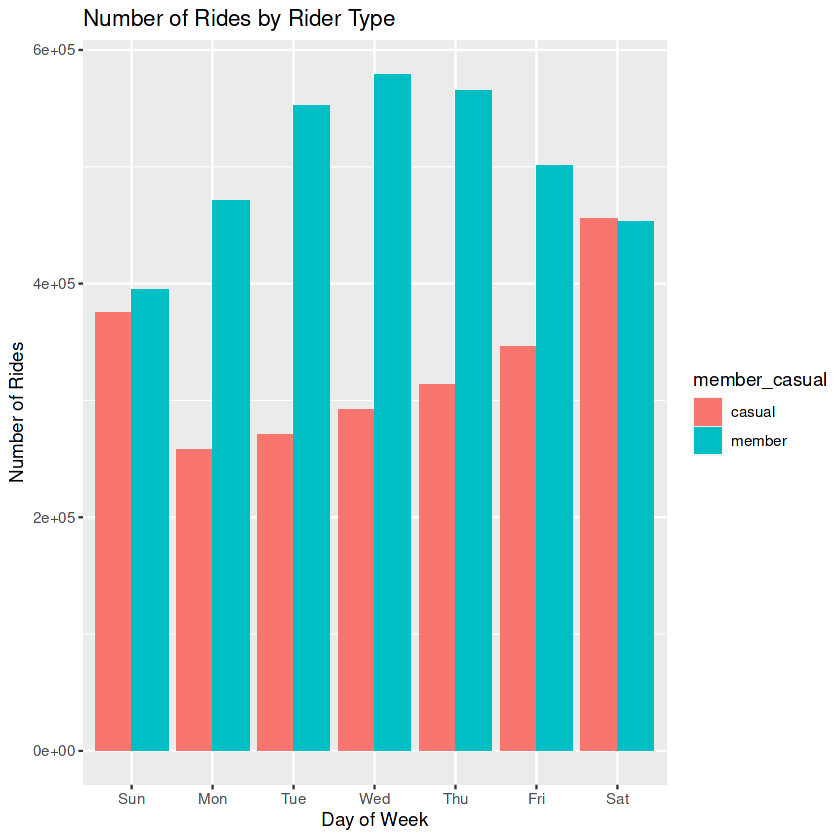

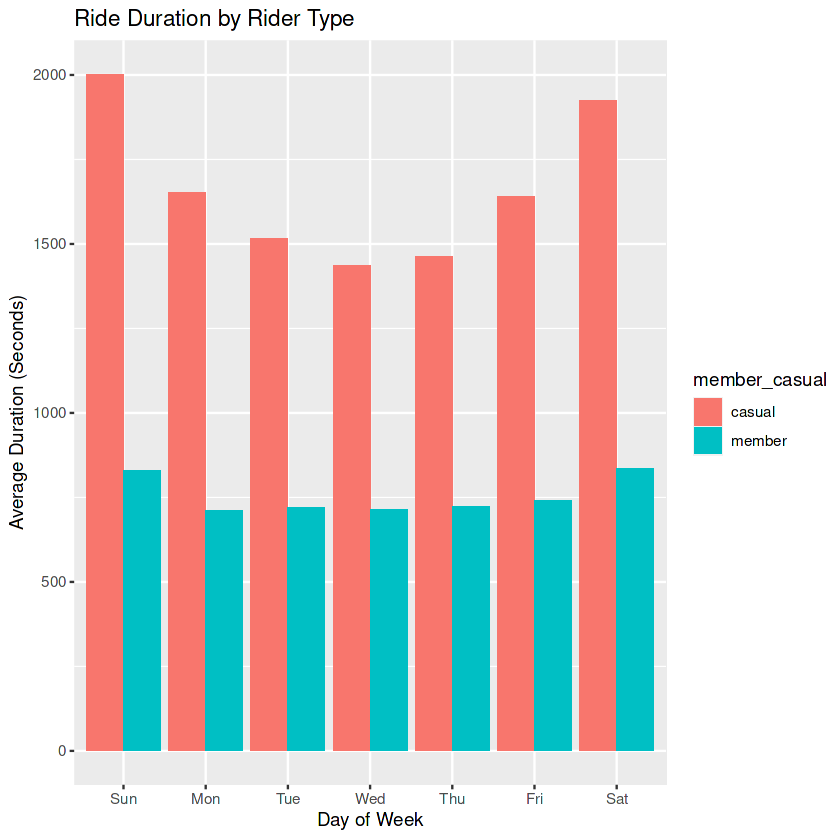

In [6]:
# Visualize the number of rides by rider type
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Rides by Rider Type",
       x = "Day of Week",
       y = "Number of Rides")

# Create a visualization for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Ride Duration by Rider Type",
       x = "Day of Week",
       y = "Average Duration (Seconds)")

## STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS

In [7]:
# Create a csv file to visualize in Excel, Tableau, etc
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = 'avg_ride_length.csv')